In [12]:
from phi.torch.flow import *
import pylab

<Figure size 1200x500 with 2 Axes>

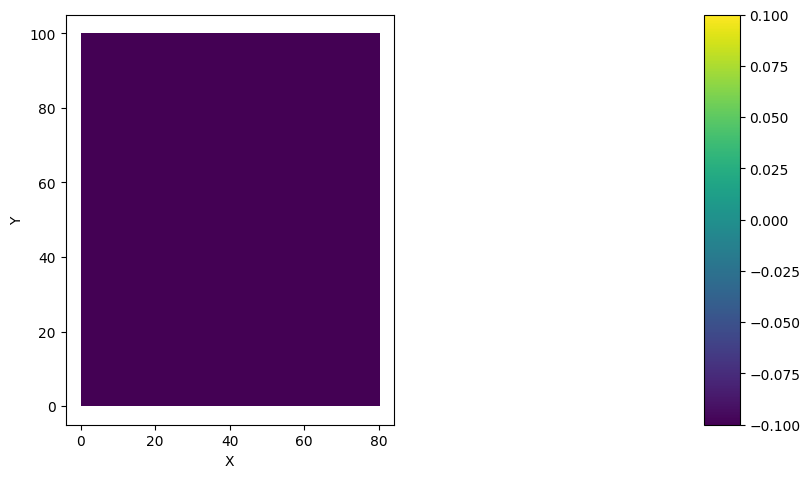

In [13]:
DT = 1.5
NU = 0.01

INFLOW = CenteredGrid(Sphere(center=tensor([30, 15], channel(vector='x,y')), radius=10), extrapolation.BOUNDARY, x=32,
                      y=40, bounds=Box(x=(0, 80), y=(0, 100))) * 0.2
smoke = CenteredGrid(0, extrapolation.BOUNDARY, x=32, y=40,
                     bounds=Box(x=(0, 80), y=(0, 100)))  # sampled at cell centers
velocity = StaggeredGrid(0, extrapolation.ZERO, x=32, y=40,
                         bounds=Box(x=(0, 80), y=(0, 100)))  # sampled in staggered form at face centers 


def step(velocity, smoke, pressure, dt=1.0, buoyancy_factor=1.0):
    smoke = advect.semi_lagrangian(smoke, velocity, dt) + INFLOW
    buoyancy_force = (smoke * (0, buoyancy_factor)).at(velocity)  # resamples smoke to velocity sample points
    velocity = advect.semi_lagrangian(velocity, velocity, dt) + dt * buoyancy_force
    velocity = diffuse.explicit(velocity, NU, dt)
    velocity, pressure = fluid.make_incompressible(velocity)
    return velocity, smoke, pressure

plot(smoke)

<Figure size 1200x500 with 2 Axes>

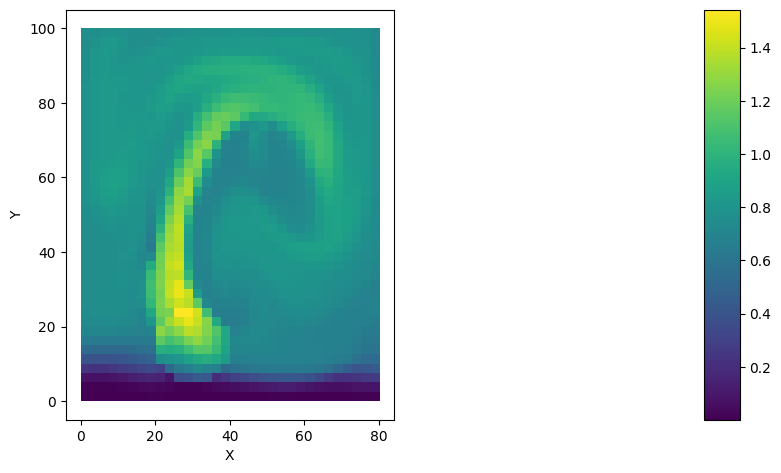

In [14]:
for time_step in range(100):
    velocity, smoke, pressure = step(velocity, smoke, pressure, dt=DT)
plot(smoke)